# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### Store the dataset into the Dataframe


In [3]:
df=pd.read_csv("dataset.csv")

### Check the shape of the dataframe


In [4]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [6]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [7]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [8]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [9]:
df.isnull().sum()/df.shape[0]*100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [10]:
df['invoice_id'].unique()

array([1.93043849e+09, 1.92964641e+09, 1.92987376e+09, ...,
       1.93053678e+09, 1.93019855e+09, 1.92857632e+09])

In [11]:
df['doc_id'].unique()

array([1.93043849e+09, 1.92964641e+09, 1.92987376e+09, ...,
       1.93053678e+09, 1.93019855e+09, 1.92857632e+09])

#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [12]:
df[['baseline_create_date',"document_create_date",'document_create_date.1']].head(5)

,baseline_create_date,document_create_date,document_create_date.1
0,20200126.0,20200125,20200126
1,20190722.0,20190722,20190722
2,20190914.0,20190914,20190914
3,20200331.0,20200330,20200330
4,20191113.0,20191113,20191113


In [13]:
cols=['baseline_create_date',"document_create_date",'document_create_date.1']
for col in cols:
    for col_ in cols:
        if col!=col_:
            common=len(list(set(df[col].unique().tolist()).intersection(set(df[col_].unique().tolist()))))
            print(f"for col {col} and {col_} we have common {common} values")

for col baseline_create_date and document_create_date we have common 502 values
for col baseline_create_date and document_create_date.1 we have common 505 values
for col document_create_date and baseline_create_date we have common 502 values
for col document_create_date and document_create_date.1 we have common 503 values
for col document_create_date.1 and baseline_create_date we have common 505 values
for col document_create_date.1 and document_create_date we have common 503 values


#### Please check, Column 'posting_id' is constant columns or not


In [14]:
df['posting_id'].unique()

array([1.])

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [15]:
df['isOpen'].unique()

array([0, 1], dtype=int64)

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [16]:
df.drop(['area_business'
,"posting_id"
,"invoice_id"
,"document_create_date"
,"isOpen"
,'document type'
,'document_create_date.1'],axis=1,inplace=True)


### Please check from the dataframe whether all the columns are removed or not 

In [17]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4


### Show all the Duplicate rows from the dataframe

In [18]:
df.loc[df.duplicated()==True,].head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10


### Display the Number of Duplicate Rows

In [19]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [20]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [21]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [22]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [23]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48839 entries, 0 to 48838
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         48839 non-null  object 
 1   cust_number           48839 non-null  object 
 2   name_customer         48839 non-null  object 
 3   clear_date            39158 non-null  object 
 4   buisness_year         48839 non-null  float64
 5   doc_id                48839 non-null  float64
 6   posting_date          48839 non-null  object 
 7   due_in_date           48839 non-null  float64
 8   invoice_currency      48839 non-null  object 
 9   total_open_amount     48839 non-null  float64
 10  baseline_create_date  48839 non-null  float64
 11  cust_payment_terms    48839 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [25]:
df[['clear_date'
,'posting_date'
,'due_in_date'
,'baseline_create_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48839 entries, 0 to 48838
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clear_date            39158 non-null  object 
 1   posting_date          48839 non-null  object 
 2   due_in_date           48839 non-null  float64
 3   baseline_create_date  48839 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.5+ MB


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [26]:
df['clear_date']=pd.to_datetime(df['clear_date'])
df['posting_date']=pd.to_datetime(df['posting_date'])
df['due_in_date']=pd.to_datetime(df['due_in_date'])
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'])

### Please check the datatype of all the columns after conversion of the above 4 columns

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48839 entries, 0 to 48838
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         48839 non-null  object        
 1   cust_number           48839 non-null  object        
 2   name_customer         48839 non-null  object        
 3   clear_date            39158 non-null  datetime64[ns]
 4   buisness_year         48839 non-null  float64       
 5   doc_id                48839 non-null  float64       
 6   posting_date          48839 non-null  datetime64[ns]
 7   due_in_date           48839 non-null  datetime64[ns]
 8   invoice_currency      48839 non-null  object        
 9   total_open_amount     48839 non-null  float64       
 10  baseline_create_date  48839 non-null  datetime64[ns]
 11  cust_payment_terms    48839 non-null  object        
dtypes: datetime64[ns](4), float64(3), object(5)
memory usage: 4.5+ MB


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [28]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [29]:
df['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
48834     3187.86
48835     6766.54
48836     6120.86
48837       63.48
48838     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [30]:
df['converted_usd']=df['total_open_amount']

In [31]:
df.loc[df['invoice_currency']=="CAD",'converted_usd']=df.loc[df['invoice_currency']=="CAD",'converted_usd']*0.7

### Display the new "converted_usd" column values

In [32]:
df.loc[df['invoice_currency']=="CAD",['converted_usd','total_open_amount']]

,converted_usd,total_open_amount
3,2309.790,3299.70
5,15558.088,22225.84
25,64982.589,92832.27
29,33889.296,48413.28
44,22200.822,31715.46
...,...,...
48713,1153.152,1647.36
48727,32687.550,46696.50
48770,4009.110,5727.30
48792,65370.767,93386.81


In [33]:
df['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [34]:
df.drop(['invoice_currency','total_open_amount'],axis=1,inplace=True)

### Write a code to check the number of columns in dataframe

In [35]:
len(df.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [36]:
df.isna().sum().loc[df.isna().sum()>0]

clear_date    9681
dtype: int64

#### Find out the number of null values from the column that you got from the above code

In [37]:
df.isna().sum().loc[df.isna().sum()>0].values

array([9681], dtype=int64)

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [38]:
main_data=df.loc[df['clear_date'].isnull()==False].reset_index(drop=True)
test_data=df.loc[df['clear_date'].isnull()==True].reset_index(drop=True)

### Check the number of Rows and Columns for both the dataframes 

In [39]:
main_data.shape

(39158, 11)

In [40]:
test_data.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [41]:
main_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,1970-01-01 00:00:00.020200126,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,1970-01-01 00:00:00.020190722,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,1970-01-01 00:00:00.020190929,1970-01-01 00:00:00.020190914,NAA8,2253.860
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,1970-01-01 00:00:00.020191128,1970-01-01 00:00:00.020191113,NAH4,33133.290
4,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,1970-01-01 00:00:00.020191004,1970-01-01 00:00:00.020190924,CA10,15558.088


In [42]:
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,1970-01-01 00:00:00.020200410,1970-01-01 00:00:00.020200331,CA10,2309.79
1,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,1970-01-01 00:00:00.020200403,1970-01-01 00:00:00.020200319,NAA8,11173.02
2,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,3525.59
3,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,1970-01-01 00:00:00.020200430,1970-01-01 00:00:00.020200415,NAA8,121105.65
4,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,1970-01-01 00:00:00.020200426,1970-01-01 00:00:00.020200416,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [43]:
main_data['Delay']=main_data['clear_date']-main_data['due_in_date']

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [44]:
main_data.groupby('name_customer')['Delay'].mean()

name_customer
11078 us               18017 days 23:59:59.979809536
17135 associates       18190 days 23:59:59.979809024
17135 llc              18311 days 23:59:59.979799808
236008 associates      18224 days 23:59:59.979808768
99 CE                  18305 days 11:59:59.979799808
                                    ...             
YEN BROS corp          18333 days 23:59:59.979799808
YEN BROS corporation   18151 days 23:59:59.979809024
YEN BROS llc           18164 days 23:59:59.979809024
ZARCO co               18037 days 23:59:59.979809536
ZIYAD  us              18112 days 23:59:59.979809280
Name: Delay, Length: 3889, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [45]:
main_data['avg_delay']=main_data['name_customer'].map(main_data.groupby('name_customer')['Delay'].mean().to_dict())

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [46]:
main_data['avg_delay']=main_data['avg_delay'].dt.seconds

### Display the maindata dataframe 

In [47]:
main_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,1970-01-01 00:00:00.020200126,NAH4,54273.280,18302 days 23:59:59.979799790,32337
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,1970-01-01 00:00:00.020190722,NAD1,79656.600,18115 days 23:59:59.979809189,86399
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,1970-01-01 00:00:00.020190929,1970-01-01 00:00:00.020190914,NAA8,2253.860,18259 days 23:59:59.979809071,39272
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,1970-01-01 00:00:00.020191128,1970-01-01 00:00:00.020191113,NAH4,33133.290,18224 days 23:59:59.979808872,80169
4,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,1970-01-01 00:00:00.020191004,1970-01-01 00:00:00.020190924,CA10,15558.088,18233 days 23:59:59.979808996,47999


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [48]:
main_data.drop(['Delay','clear_date'],axis=1,inplace=True)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [49]:
X=main_data.drop('avg_delay',axis=1)
y=main_data['avg_delay']

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_loc_test,y_train,y_loc_test=train_test_split(X,y,test_size=0.4,random_state=42)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [52]:
(X_train.shape,X_loc_test.shape,y_train.shape,y_loc_test.shape)

((23494, 10), (15664, 10), (23494,), (15664,))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [53]:
X_val,X_test,y_val,y_test=train_test_split(X_loc_test,y_loc_test,test_size=0.5,random_state=42)

### Please check for the number of rows and columns of all the 4 dataframes 

In [54]:
(X_val.shape,X_test.shape,y_val.shape,y_test.shape)

((7832, 10), (7832, 10), (7832,), (7832,))

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

<AxesSubplot:xlabel='avg_delay', ylabel='Count'>

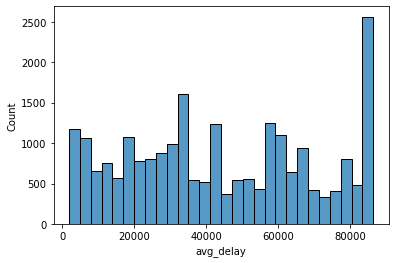

In [55]:
sns.histplot(y_train)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [56]:
#X_train['doc_counts']=X_train.groupby('name_customer',as_index=False)['doc_id'].count()
TEMP=X_train.groupby('name_customer',as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id', ylabel='count'>

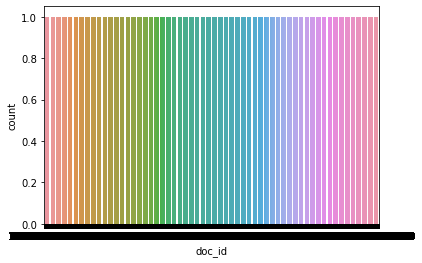

In [57]:
sns.countplot(X_train['doc_id'])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='buisness_year', ylabel='count'>

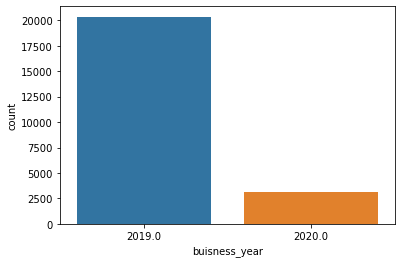

In [58]:
sns.countplot(X_train['buisness_year'])

<AxesSubplot:xlabel='buisness_year', ylabel='doc_id'>

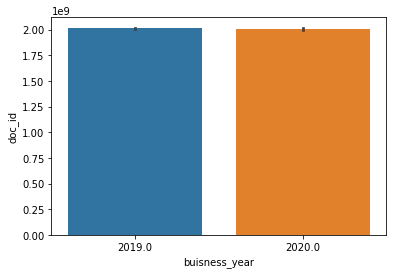

In [59]:
sns.barplot(X_train['buisness_year'],X_train['doc_id'])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [60]:
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [61]:
X_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200756072,REINHA corp,2019.0,1.929516e+09,2019-06-20,1970-01-01 00:00:00.020190705,1970-01-01 00:00:00.020190620,NAA8,54315.10
1,U001,0200776463,KROGE corp,2020.0,1.930432e+09,2020-01-23,1970-01-01 00:00:00.020200207,1970-01-01 00:00:00.020200123,NAA8,52725.92
2,U001,0200794332,COST systems,2019.0,1.928699e+09,2019-01-30,1970-01-01 00:00:00.020190214,1970-01-01 00:00:00.020190130,NAAX,21126.47
3,U001,0200780383,MEIJ foundation,2020.0,1.930341e+09,2019-12-31,1970-01-01 00:00:00.020200115,1970-01-01 00:00:00.020191231,NAA8,143649.72
4,U001,0200769623,WAL-MAR foundation,2019.0,1.929881e+09,2019-09-17,1970-01-01 00:00:00.020191002,1970-01-01 00:00:00.020190917,NAH4,14864.00


In [62]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.134077,2.011913e+09,30618.192289
std,0.340742,2.852458e+08,36500.609654
min,2019.000000,1.928502e+09,0.790000
25%,2019.000000,1.929174e+09,4569.665750
50%,2019.000000,1.929732e+09,16795.265000
75%,2019.000000,1.930209e+09,45472.520500
max,2020.000000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [63]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [64]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [65]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [66]:
X_train[['business_code','business_code_enc']].head()

,business_code,business_code_enc
0,U001,1
1,U001,1
2,U001,1
3,U001,1
4,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [67]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [68]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [69]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [70]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [71]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [72]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [73]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [74]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23494 entries, 0 to 23493
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             23494 non-null  int32         
 1   buisness_year           23494 non-null  float64       
 2   doc_id                  23494 non-null  float64       
 3   posting_date            23494 non-null  datetime64[ns]
 4   due_in_date             23494 non-null  datetime64[ns]
 5   baseline_create_date    23494 non-null  datetime64[ns]
 6   converted_usd           23494 non-null  float64       
 7   business_code_enc       23494 non-null  int32         
 8   name_customer_enc       23494 non-null  int32         
 9   cust_payment_terms_enc  23494 non-null  int32         
dtypes: datetime64[ns](3), float64(3), int32(4)
memory usage: 1.4 MB


In [76]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 35447 to 11060
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             7832 non-null   int32         
 1   buisness_year           7832 non-null   float64       
 2   doc_id                  7832 non-null   float64       
 3   posting_date            7832 non-null   datetime64[ns]
 4   due_in_date             7832 non-null   datetime64[ns]
 5   baseline_create_date    7832 non-null   datetime64[ns]
 6   converted_usd           7832 non-null   float64       
 7   business_code_enc       7832 non-null   int32         
 8   name_customer_enc       7832 non-null   int32         
 9   cust_payment_terms_enc  7832 non-null   int32         
dtypes: datetime64[ns](3), float64(3), int32(4)
memory usage: 550.7 KB


In [77]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 4945 to 35187
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             7832 non-null   int32         
 1   buisness_year           7832 non-null   float64       
 2   doc_id                  7832 non-null   float64       
 3   posting_date            7832 non-null   datetime64[ns]
 4   due_in_date             7832 non-null   datetime64[ns]
 5   baseline_create_date    7832 non-null   datetime64[ns]
 6   converted_usd           7832 non-null   float64       
 7   business_code_enc       7832 non-null   int32         
 8   name_customer_enc       7832 non-null   int32         
 9   cust_payment_terms_enc  7832 non-null   int32         
dtypes: datetime64[ns](3), float64(3), int32(4)
memory usage: 550.7 KB


### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [78]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [79]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [80]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [81]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [82]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [83]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23494 entries, 0 to 23493
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             23494 non-null  int32  
 1   buisness_year           23494 non-null  float64
 2   doc_id                  23494 non-null  float64
 3   converted_usd           23494 non-null  float64
 4   business_code_enc       23494 non-null  int32  
 5   name_customer_enc       23494 non-null  int32  
 6   cust_payment_terms_enc  23494 non-null  int32  
 7   day_of_postingdate      23494 non-null  int64  
 8   month_of_postingdate    23494 non-null  int64  
 9   year_of_postingdate     23494 non-null  int64  
 10  day_of_createdate       23494 non-null  int64  
 11  month_of_createdate     23494 non-null  int64  
 12  year_of_createdate      23494 non-null  int64  
 13  day_of_due              23494 non-null  int64  
 14  month_of_due            23494 non-null

In [85]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 35447 to 11060
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int32  
 1   buisness_year           7832 non-null   float64
 2   doc_id                  7832 non-null   float64
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int32  
 5   name_customer_enc       7832 non-null   int32  
 6   cust_payment_terms_enc  7832 non-null   int32  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_createdate       7832 non-null   int64  
 11  month_of_createdate     7832 non-null   int64  
 12  year_of_createdate      7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nu

In [86]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 4945 to 35187
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int32  
 1   buisness_year           7832 non-null   float64
 2   doc_id                  7832 non-null   float64
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int32  
 5   name_customer_enc       7832 non-null   int32  
 6   cust_payment_terms_enc  7832 non-null   int32  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_createdate       7832 non-null   int64  
 11  month_of_createdate     7832 non-null   int64  
 12  year_of_createdate      7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nul

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [87]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

10

- Note - Keep the code as it is, no need to change 


In [88]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

6


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [89]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

4


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [90]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [91]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

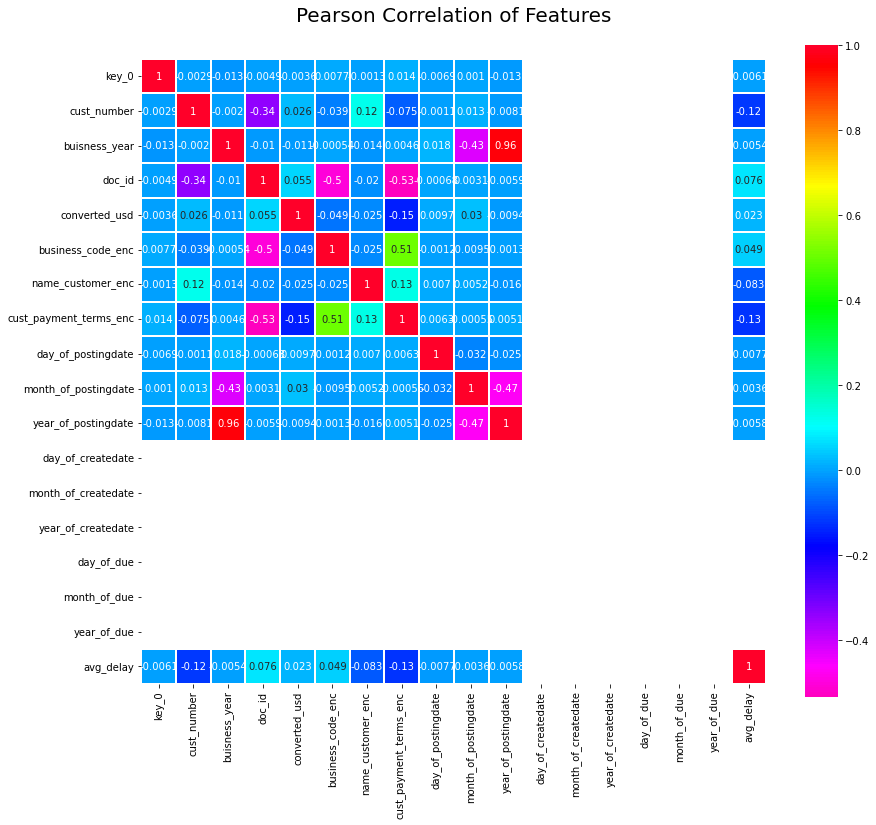

In [92]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(pd.merge(X_train,y_train,left_on=X_train.index.values,right_on=y_train.index.values).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [93]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [94]:
sel.variances_

array([1.73096954e+15, 1.16100201e-01, 8.13617218e+16, 1.33223780e+09,
       2.80596482e-01, 1.05187609e+06, 1.23314110e+02, 7.59077911e+01,
       1.23199874e+01, 1.16288980e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [95]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [96]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [97]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [98]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

25624.198379613223

### Display The Comparison Lists

In [99]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[655900481.9754525],[0.037726525955138146],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [100]:
from sklearn.svm import SVR

In [101]:
Algorithm.append('SVR')
regressor=SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [103]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

26247.541701018872

### Display The Comparison Lists

In [104]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR'],[655900481.9754525, 683304371.0818602],[0.037726525955138146, -0.0024777981724204423],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
Algorithm.append('Decision Tree')
regressor=DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [107]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [108]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

13599.638676956427

### Display The Comparison Lists

In [109]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'Decision Tree'],[655900481.9754525, 683304371.0818602, 187812093.96871808],[0.037726525955138146, -0.0024777981724204423, 0.724460339491438],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
Algorithm.append('Random Forest Regression')
regressor=RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [112]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [113]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

10821.252414797676

### Display The Comparison Lists


In [114]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'Decision Tree', 'Random Forest Regression'],[655900481.9754525, 683304371.0818602, 187812093.96871808, 113291277.86083224],[0.037726525955138146, -0.0024777981724204423, 0.724460339491438, 0.833790042053659],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [115]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

ModuleNotFoundError: No module named 'xgboost'

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists


In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

## You need to make the comparison list into a comparison dataframe 

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [ ]:
mean_squared_error(y_test,predictedfinal,squared=False)

### Calculate the mean Square Error for validation dataset

In [ ]:
mean_squared_error(y_val, predict_testfinal)

### Calculate the R2 score for test

In [ ]:
r2_score(y_test, predictedfinal)

### Calculate the R2 score for Validation

In [ ]:
r2_score(y_val, predict_testfinal)

### Calculate the Accuracy for train Dataset 

### Calculate the accuracy for validation

### Calculate the accuracy for test

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

From above calculations, when MSE_Score is low and R2_Score is high in that case the machine learning model is good.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [ ]:
test_data.head()

### Check for the number of rows and columns in the nulldata

In [ ]:
test_data.shape

### Check the Description and Information of the nulldata 

In [ ]:
test_data.info()

### Storing the Nulldata into a different dataset 
# for BACKUP

In [ ]:
nulldata1=test_data.copy()
nulldata=test_data.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [ ]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [ ]:
def get_date_features(data,col,new_col_name):
    data[f'day_of_{new_col_name}'] = data[col].dt.day
    data[f'month_of_{new_col_name}'] = data[col].dt.month
    data[f'year_of_{new_col_name}'] = data[col].dt.year
    return data
date_features={"clear_date":"cleardate","posting_date":"postingdate","due_in_date":"due",
              "baseline_create_date":"createdate"}
for col,new_col in date_features.items():
    nulldata=get_date_features(nulldata,col,new_col)

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [ ]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [ ]:
nulldata.info()

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [ ]:
nulldata.drop(['business_code'
,"baseline_create_date"
,"due_in_date"
,"posting_date"
,"name_customer"
,"clear_date"
,"cust_payment_terms"
,'day_of_cleardate'
,"month_of_cleardate"
,"year_of_cleardate"],axis=1,inplace=True)

### Check the information of the "nulldata" dataframe

In [ ]:
nulldata.info()

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [ ]:
X_test.info()

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [ ]:
X_test.columns

In [ ]:
nulldata.columns

In [ ]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [ ]:
nulldata2.head()

### Now you can pass this dataset into you final model and store it into "final_result"

In [ ]:
final_result=regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [ ]:
final_result

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index.values )

### Display the "Final" dataframe 

In [ ]:
Final.head()

### Check for the Number of Rows and Columns in your "Final" dataframe 

In [ ]:
Final.shape

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [ ]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [ ]:
Final['clear_date'].head()

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [ ]:
Final['avg_delay'].head()

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:
bins= [0,15,30,45,60,100]
labels =['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [ ]:
Final.drop(['key_0','avg_delay'],axis=1,inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [ ]:
Final['Aging Bucket'].value_counts()

### Display your final dataset with aging buckets 

In [ ]:
Final.head()

### Store this dataframe into the .csv format

In [ ]:
Final.to_csv('PALAKONDA_VENKATA_REVANTH_REDDY_PAYMENT_DAY_PREDICTION.csv',index=False)

# END OF THE PROJECT